# Classification using linear models

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Annual power consumption data

## Case description / business understanding 

Electric utility companies do not know much about their customers. The information that is available for all customers is their consumption and address. In addition, some utility companies use web-portals to engage a part of their users and collect some additional information.


Some example questions the utility companies want to answer with the help of this data

* Who are the customers using the efficiency portal?
* Can we learn from the information provided on the portal? Can we predict this information for other customers?
* What are the typical customers?

We use a dataset that consists of two combined parts

1. Yearly electricity consumption (address and consumption in kW).
2. Data collected via an efficiency web application (detailed household information and activity on the customers)


In [5]:
apc = pd.read_csv('data/APC-dataset-anonym.csv', sep=';')
apc.head(5)
#apc.shape

,ID,PLZ,Strasse,Betreff,Cons_2011,Days_2011,Cons_2012,Days_2012,Cons_2013,Days_2013,...,Portal,pPoints,pEarnedPoints,pHouseholdType,pMainHeatingType,pWaterHeatingType,pLivingAreaM2,pHouseholdMembers,pCreated,pLastVisited
0,1,3604.0,Adlerstrasse,NaN,3460.0,364.0,3116.0,365.0,3398.0,365.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,2,8200.0,Amselweg,Whg 38 Strom,3028.0,364.0,4539.0,456.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,3,8200.0,Amselweg,Whg 39 Strom,1777.0,364.0,2478.0,456.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,4,8200.0,Amselweg,Whg 37 Strom,2173.0,364.0,2879.0,456.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
4,5,8200.0,Amselweg,Whg 34 Strom,0.0,0.0,1130.0,456.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


|Variable          | Description|
|------------------|------------|
|ID	Unique         |customer ID |
|PLZ               |address information: postal code|
|City              |address information: city|
|Strasse           |address information: street|
|Betreff           |miscellaneous information about the meter and the housing|
|Cons_2011;Cons_2012;Cons_2013 |consumption in kWh per year|
|Days_2011;Days_2012;Days_2013 | days in one year in which the consumption was created|
|FilterNonHousehold |a filter created by the utility; the company is not sure if it covers all non-households|
|Portal            |indicates whether the customer uses the energy efficiency portal|
|pPoints           |points on the portal|
|pEarnedPoints     |earned points on the porta|
|pHouseholdType    |type of housing |
|pMainHeatingType  |the main heating type of the household | 
|pWaterHeatingType |the type of water heating|
|pLivingAreaM2     |the living area of the household|
|pHouseholdMembers |the number of people living in the household|
|pDateCreated      |timestamp of account creation|
|pLastVisited      |Visited	timestamp of the last visit|



In [7]:
apc.describe(include='all')

,ID,PLZ,Strasse,Betreff,Cons_2011,Days_2011,Cons_2012,Days_2012,Cons_2013,Days_2013,...,Portal,pPoints,pEarnedPoints,pHouseholdType,pMainHeatingType,pWaterHeatingType,pLivingAreaM2,pHouseholdMembers,pCreated,pLastVisited
count,1299.00000,1236.000000,1236,1221,1163.000000,1234.000000,1149.000000,1235.000000,1118.000000,1233.000000,...,1236.000000,15.000000,15.000000,14,14,14,1236.000000,1236.000000,15,15
unique,NaN,NaN,41,228,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,5,6,NaN,NaN,14,14
top,NaN,NaN,Reuthstraße,Einfamilienhaus,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,appartment,gas,electric,NaN,NaN,03.09.12 11:06,03.09.12 13:52
freq,NaN,NaN,364,131,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7,7,4,NaN,NaN,2,2
mean,650.00000,8276.605987,NaN,NaN,1584.337059,195.187196,2672.342907,316.844534,1721.134168,200.022709,...,0.012136,295.733333,295.733333,NaN,NaN,NaN,1.660194,0.029935,NaN,NaN
std,375.13331,494.921571,NaN,NaN,1950.346635,111.361331,2802.995836,147.964263,2432.125878,179.823121,...,0.109537,261.357573,261.357573,NaN,NaN,NaN,17.749204,0.311575,NaN,NaN
min,1.00000,3600.000000,NaN,NaN,-1356.000000,-106.000000,-563.000000,-178.000000,-421.000000,-90.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,325.50000,8200.000000,NaN,NaN,548.000000,179.000000,1083.000000,356.000000,0.000000,0.000000,...,0.000000,113.500000,113.500000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,650.00000,8400.000000,NaN,NaN,1054.000000,182.000000,1924.000000,361.000000,1074.500000,363.000000,...,0.000000,229.000000,229.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
75%,974.50000,8400.000000,NaN,NaN,1960.000000,196.000000,3324.000000,367.000000,2499.500000,367.000000,...,0.000000,461.000000,461.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN


In [9]:
apc.isnull().sum()

ID                       0
PLZ                     63
Strasse                 63
Betreff                 78
Cons_2011              136
Days_2011               65
Cons_2012              150
Days_2012               64
Cons_2013              181
Days_2013               66
FilterNonHousehold      63
Portal                  63
pPoints               1284
pEarnedPoints         1284
pHouseholdType        1285
pMainHeatingType      1285
pWaterHeatingType     1285
pLivingAreaM2           63
pHouseholdMembers       63
pCreated              1284
pLastVisited          1284
dtype: int64

In [11]:
apc.dtypes

ID                      int64
PLZ                   float64
Strasse                object
Betreff                object
Cons_2011             float64
Days_2011             float64
Cons_2012             float64
Days_2012             float64
Cons_2013             float64
Days_2013             float64
FilterNonHousehold    float64
Portal                float64
pPoints               float64
pEarnedPoints         float64
pHouseholdType         object
pMainHeatingType       object
pWaterHeatingType      object
pLivingAreaM2         float64
pHouseholdMembers     float64
pCreated               object
pLastVisited           object
dtype: object

## Data preparation - exercises
1. Inspect the output of the previous chunks. What are problematic values in the data, and how could we handle them?
2. Use the function `value_counts()` to see the distribution of the column `Portal`

In [43]:
# Problem 1: Negative values in the consumption / days
# Problem 2: Maximum of days and consumption is quite large
# solution: we normalize the consumption with the number of days to consumption per day (CPD)
apc['CPD_2011'] = apc['Cons_2011'] / apc['Days_2011']
apc['CPD_2012'] = apc['Cons_2012'] / apc['Days_2012']
apc['CPD_2013'] = apc['Cons_2013'] / apc['Days_2013']

# Problem 3: Missing values in consumption and days is different
# Problem 4: Large number of NA values for points, household type, ...
# Problem 5: a value of 0 makes no sense for living area
# Problem 6: Date created and last modified is the wrong format
# Problem 7: PLZ wrong data format

#Überblick über die Portalnutzung
apc['Portal'].value_counts()

Portal
0.0    1221
1.0      15
Name: count, dtype: int64

## A linear regression model for portal usage
Look into the script of the last session how a model is trained using linear regression using the `scikit learn` package. 

### Exercise: Estimate regression model for portal usage
1. Try to build a model that estimates the variable `Portal` based on the code from last session.
2. Inspect the model: What can you say about its quality. You can use `np.corrcoef()` ([see documentation](https://numpy.org/doc/2.2/reference/generated/numpy.corrcoef.html)) to compute a correlation between the predicted and the true data. You can also use the function `classification_report()` from scikit learn ([see documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).

In [61]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

data_complete = apc[['CPD_2011', 'CPD_2012', 'CPD_2013', 'Portal']].notnull()

#extract the variables that we need from the dataset
y = data_complete.Portal
X = data_complete[['CPD_2011', 'CPD_2012', 'CPD_2013']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# We fit a linear regression model
regr1.fit(X_train, y_train)

# The regression coefficient
print("Coefficients: \n", regr1.coef_)
print("Intercept: \n", regr1.intercept_)

#correlation between prediction and test data
y_pred = regr1.predict(X_test)
print(np.corrcoef(y_pred, y_test))

#classification statistics
print(classification_report(y_test==1, y_pred>=0.5, zero_division=0.0))


Coefficients: 
 [0.19335573 0.16215069 0.02119384]
Intercept: 
 0.6511211075924632
[[1.         0.65712255]
 [0.65712255 1.        ]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        17
        True       0.95      1.00      0.97       308

    accuracy                           0.95       325
   macro avg       0.47      0.50      0.49       325
weighted avg       0.90      0.95      0.92       325



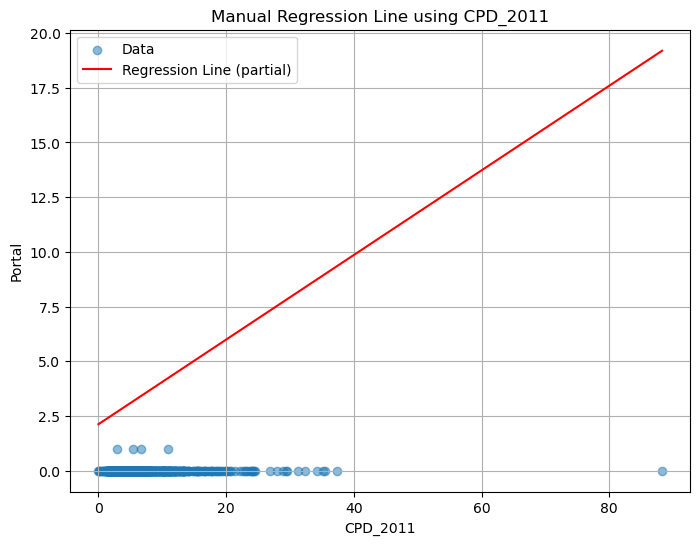

In [96]:
# Extract CPD_2011 and Portal, and drop NaNs
filtered_data = apc[['CPD_2011', 'CPD_2012', 'CPD_2013', 'Portal']].dropna()

# Set up the variables
x = filtered_data['CPD_2011']
y = filtered_data['Portal']

# Get mean values for the other variables
mean_CPD_2012 = filtered_data['CPD_2012'].mean()
mean_CPD_2013 = filtered_data['CPD_2013'].mean()

# Get the coefficients
coef_CPD_2011 = regr1.coef_[0]     # coefficient for CPD_2011
coef_CPD_2012 = regr1.coef_[1]
coef_CPD_2013 = regr1.coef_[2]
intercept = regr1.intercept_

# Calculate predicted y using only x = CPD_2011, others set to their mean
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = (
    intercept +
    coef_CPD_2011 * x_vals +
    coef_CPD_2012 * mean_CPD_2012 +
    coef_CPD_2013 * mean_CPD_2013
)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Data')
plt.plot(x_vals, y_vals, color='red', label='Regression Line (partial)')
plt.xlabel('CPD_2011')
plt.ylabel('Portal')
plt.title('Manual Regression Line using CPD_2011')
plt.legend()
plt.grid(True)

## A logistic regression model 

The linear model is incapable of predicting portal users. This is unsatisfactory. Let's try to use a logistic model. 

In [100]:
# instantiate the model (using the default parameters)
logreg = linear_model.LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

# The regression coefficient
print("Coefficients: \n", logreg.coef_)
print("Intercept: \n", logreg.intercept_)

y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

print(classification_report(y_test, y_pred))


Coefficients: 
 [[3.76034067 3.43021591 2.83880271]]
Intercept: 
 [-0.47308115]
              precision    recall  f1-score   support

       False       0.89      1.00      0.94        17
        True       1.00      0.99      1.00       308

    accuracy                           0.99       325
   macro avg       0.95      1.00      0.97       325
weighted avg       0.99      0.99      0.99       325

